In [1]:
from neuralprophet import NeuralProphet

In [19]:
from neuralprophet import set_log_level

In [22]:
import os
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
### Silence any deprecation warnings that may occur.
### Comment this if there are any issues with code
import warnings
def nowarnings(*args, **kargs): pass
warnings.warn = nowarnings

In [209]:
# print(os.listdir(os.curdir))

In [190]:
df = pd.read_csv('STA-DK0034A.csv')
df.head()

,DatetimeEnd,aqi
0,2013-01-01 00:00:00+01:00,21.0
1,2013-01-02 00:00:00+01:00,41.0
2,2013-01-03 00:00:00+01:00,39.0
3,2013-01-04 00:00:00+01:00,48.0
4,2013-01-05 00:00:00+01:00,33.0


In [191]:
### Renaming columns
df.rename(columns = {'DatetimeEnd':'ds', 'aqi':'y'}, inplace = True)
df.head()

,ds,y
0,2013-01-01 00:00:00+01:00,21.0
1,2013-01-02 00:00:00+01:00,41.0
2,2013-01-03 00:00:00+01:00,39.0
3,2013-01-04 00:00:00+01:00,48.0
4,2013-01-05 00:00:00+01:00,33.0


In [192]:
### Converting to datetime
df['ds'] = pd.DatetimeIndex(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3590 entries, 0 to 3589
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                               
---  ------  --------------  -----                               
 0   ds      3590 non-null   datetime64[ns, pytz.FixedOffset(60)]
 1   y       3590 non-null   float64                             
dtypes: datetime64[ns, pytz.FixedOffset(60)](1), float64(1)
memory usage: 56.2 KB


In [193]:
### Remove timezone info as it is not supported by NeuroProphet
df['ds'] = df['ds'].dt.tz_localize(None)
df.head()

,ds,y
0,2013-01-01,21.0
1,2013-01-02,41.0
2,2013-01-03,39.0
3,2013-01-04,48.0
4,2013-01-05,33.0


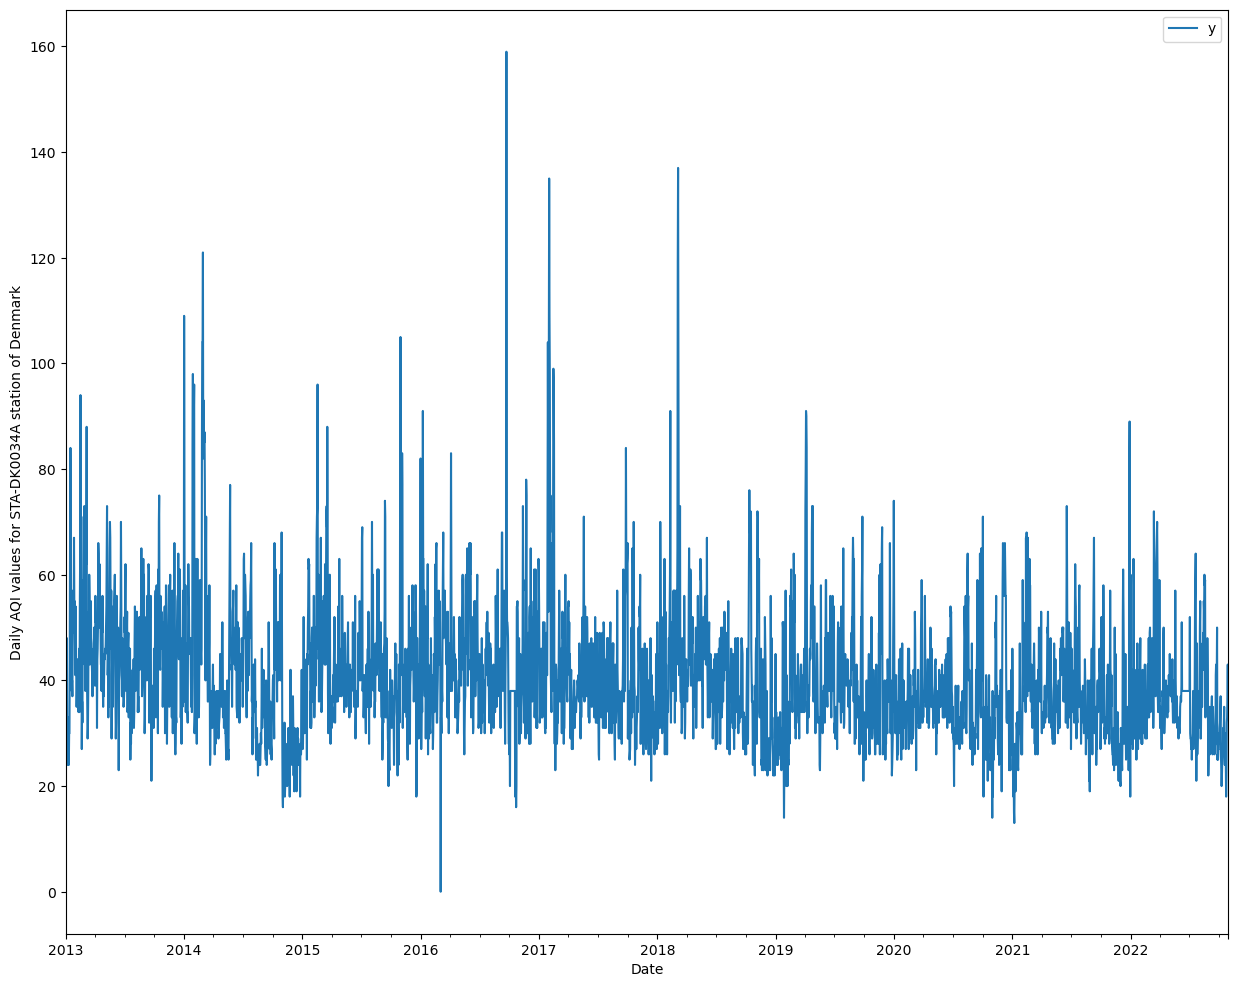

In [194]:
### Visualize the final daily AQI timeseries
ax = df.set_index('ds').plot(figsize=(15, 12))
ax.set_ylabel('Daily AQI values for STA-DK0034A station of Denmark')
ax.set_xlabel('Date')

plt.show()

In [138]:
### test run
m = NeuralProphet()
df_train, df_val = m.split_df(df, freq='D', valid_p = 0.15)
print(f"df_train size:{len(df_train)}, df_val size:{len(df_val)}")
metrics = m.fit(df_train, freq='D', validation_df=df_val)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.967% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 140


  0%|          | 0/137 [00:00<?, ?it/s]

df_train size:3052, df_val size:538


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.66E-02, min: 1.03E+00


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.66E-02, min: 7.63E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.63E-02
Epoch[140/140]: 100%|██████████| 140/140 [00:19<00:00,  7.20it/s, SmoothL1Loss=0.0179, MAE=8.59, RMSE=11.6, RegLoss=0, MAE_val=6.83, RMSE_val=9.76, SmoothL1Loss_val=0.012] 


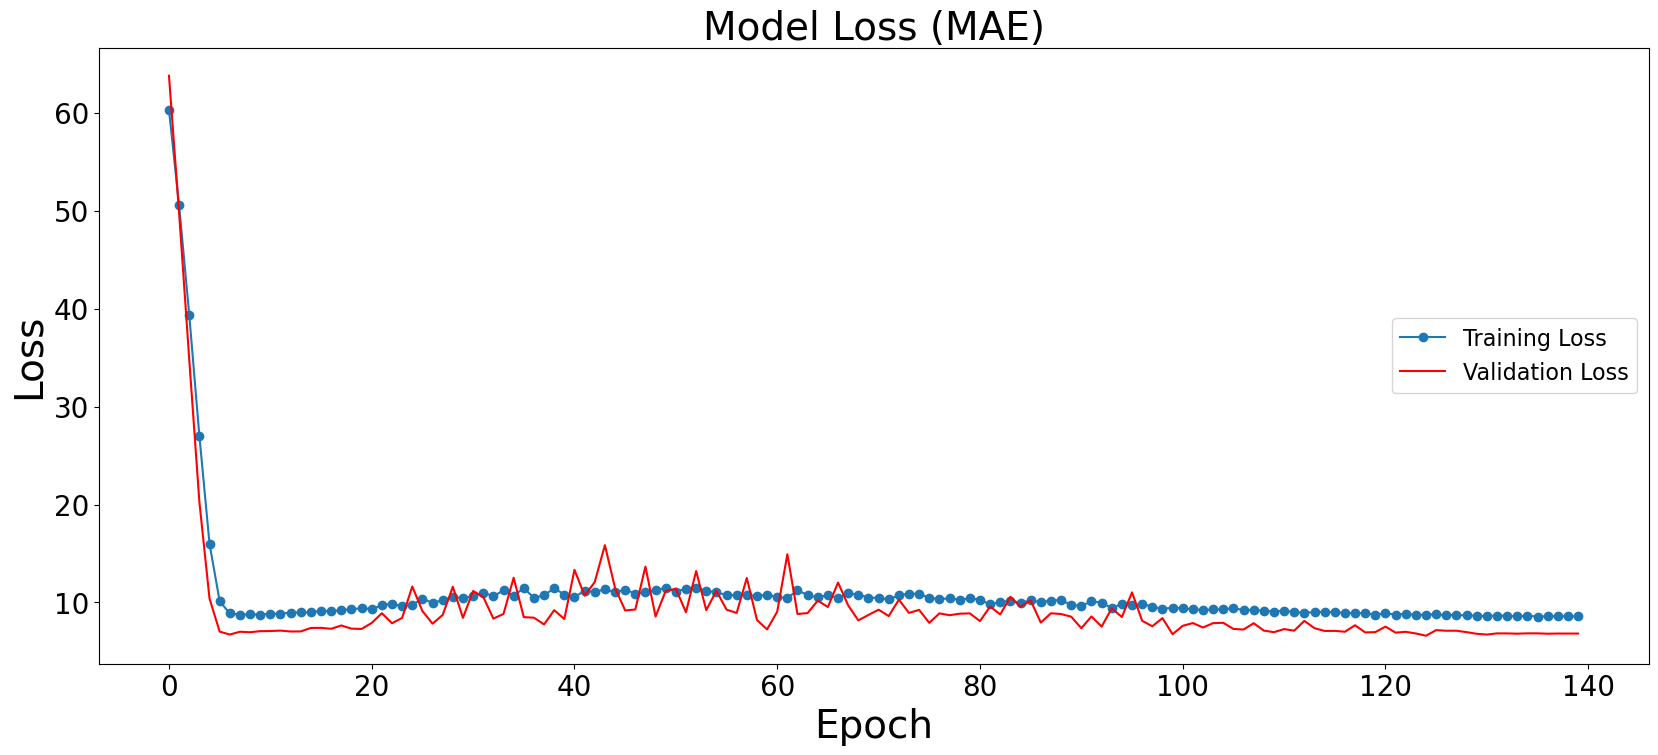

In [141]:
### Plot model loss
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(metrics["MAE"], '-o', label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28)
ax.set_ylabel("Loss", fontsize=28)
ax.set_title("Model Loss (MAE)", fontsize=28)
plt.show()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.814% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.814% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


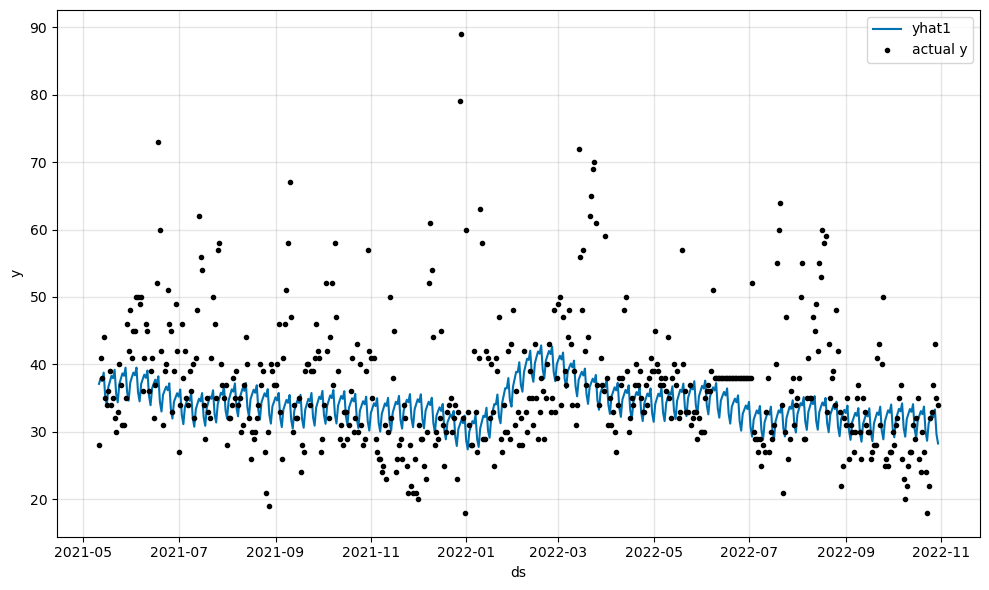

In [143]:
### Apply trained model onto df_val data and visualize prediction plot vs actual data
forecast = m.predict(df_val)
fig_forecast = m.plot(forecast)
plt.show()

In [103]:
### Create experiments dict, where we will save metrics data for each DL run
experiments_dict = {}

In [104]:
### experiment one
m = NeuralProphet()
df_train, df_val = m.split_df(df, freq='D', valid_p = 0.3)
metrics = m.fit(df_train, freq='D', validation_df=df_val)
forecast = m.predict(df_val)
experiments_dict['experiment one'] = forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.96% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 148


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.50E-02, min: 5.20E-01


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.11E-01, min: 1.32E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.02E-01
Epoch[148/148]: 100%|██████████| 148/148 [00:16<00:00,  9.10it/s, SmoothL1Loss=0.0176, MAE=8.78, RMSE=11.9, RegLoss=0, MAE_val=7.34, RMSE_val=9.82, SmoothL1Loss_val=0.0114]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.907% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.907% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


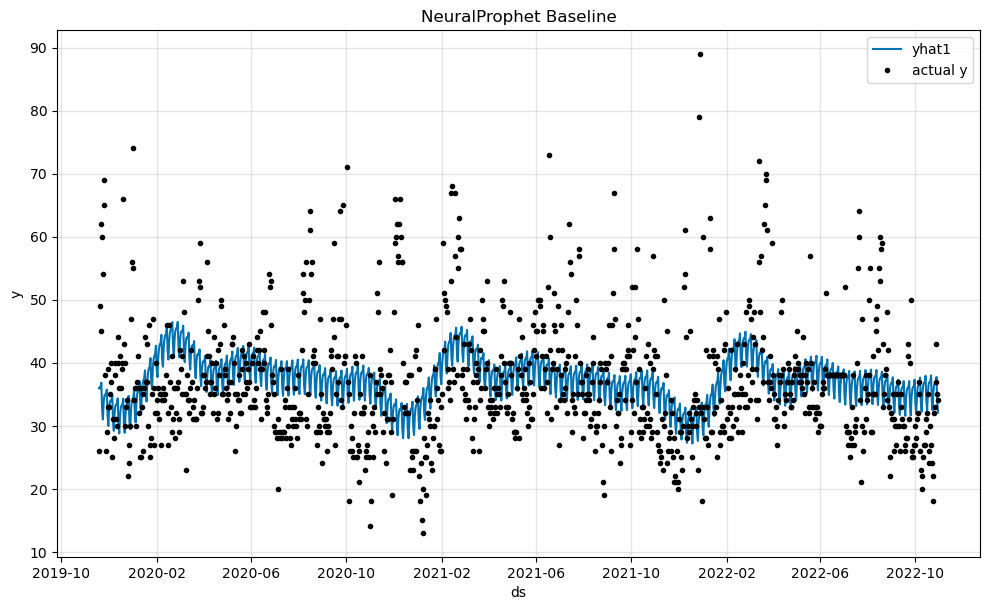

In [105]:
m.plot(forecast)
plt.title('NeuralProphet Baseline')
plt.show()

In [106]:
### experiment two
m = NeuralProphet(n_lags=30)
df_train, df_val = m.split_df(df, freq='D', valid_p = 0.3)
metrics = m.fit(df_train, freq='D', validation_df=df_val)
forecast = m.predict(df_val)
experiments_dict['experiment two'] = forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.96% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 148


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.50E-02, min: 1.32E+00


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.06E-01, min: 6.08E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.25E-01
Epoch[148/148]: 100%|██████████| 148/148 [00:18<00:00,  8.14it/s, SmoothL1Loss=0.0114, MAE=7.06, RMSE=9.59, RegLoss=0, MAE_val=6.05, RMSE_val=8, SmoothL1Loss_val=0.00758]   
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


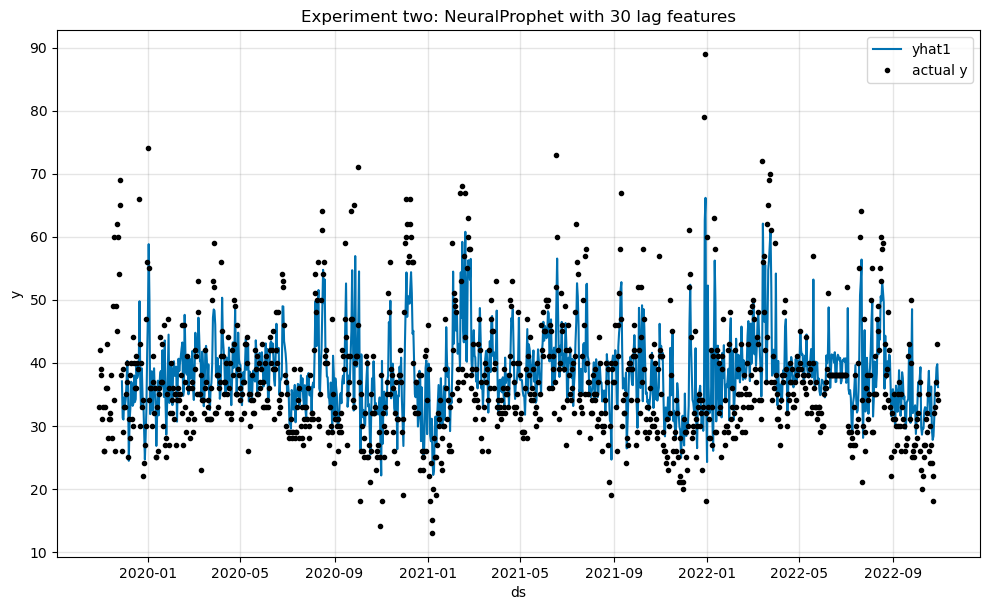

In [107]:
m.plot(forecast)
plt.title('Experiment two: NeuralProphet with 30 lag features')
plt.show()

In [108]:
### experiment three
m = NeuralProphet(n_lags=120)
df_train, df_val = m.split_df(df, freq='D', valid_p = 0.3)
metrics = m.fit(df_train, freq='D', validation_df=df_val)
forecast = m.predict(df_val)
experiments_dict['experiment three'] = forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.961% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 149


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.31E-03, min: 3.82E-01


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.31E-03, min: 4.46E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.23E-02
Epoch[149/149]: 100%|██████████| 149/149 [00:17<00:00,  8.30it/s, SmoothL1Loss=0.011, MAE=6.95, RMSE=9.4, RegLoss=0, MAE_val=6.22, RMSE_val=8.24, SmoothL1Loss_val=0.00804]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.914% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.914% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


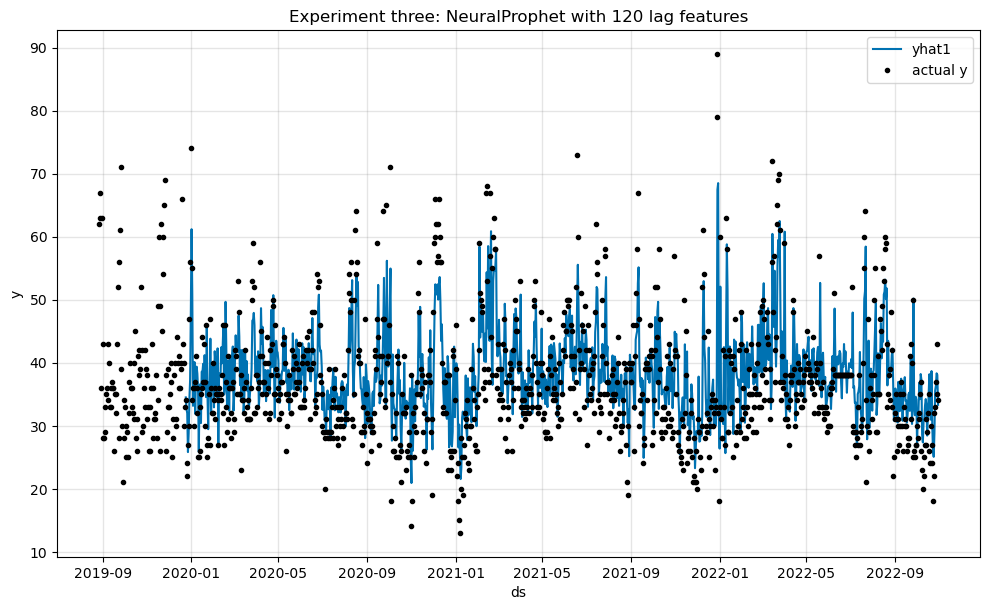

In [109]:
m.plot(forecast)
plt.title('Experiment three: NeuralProphet with 120 lag features')
plt.show()

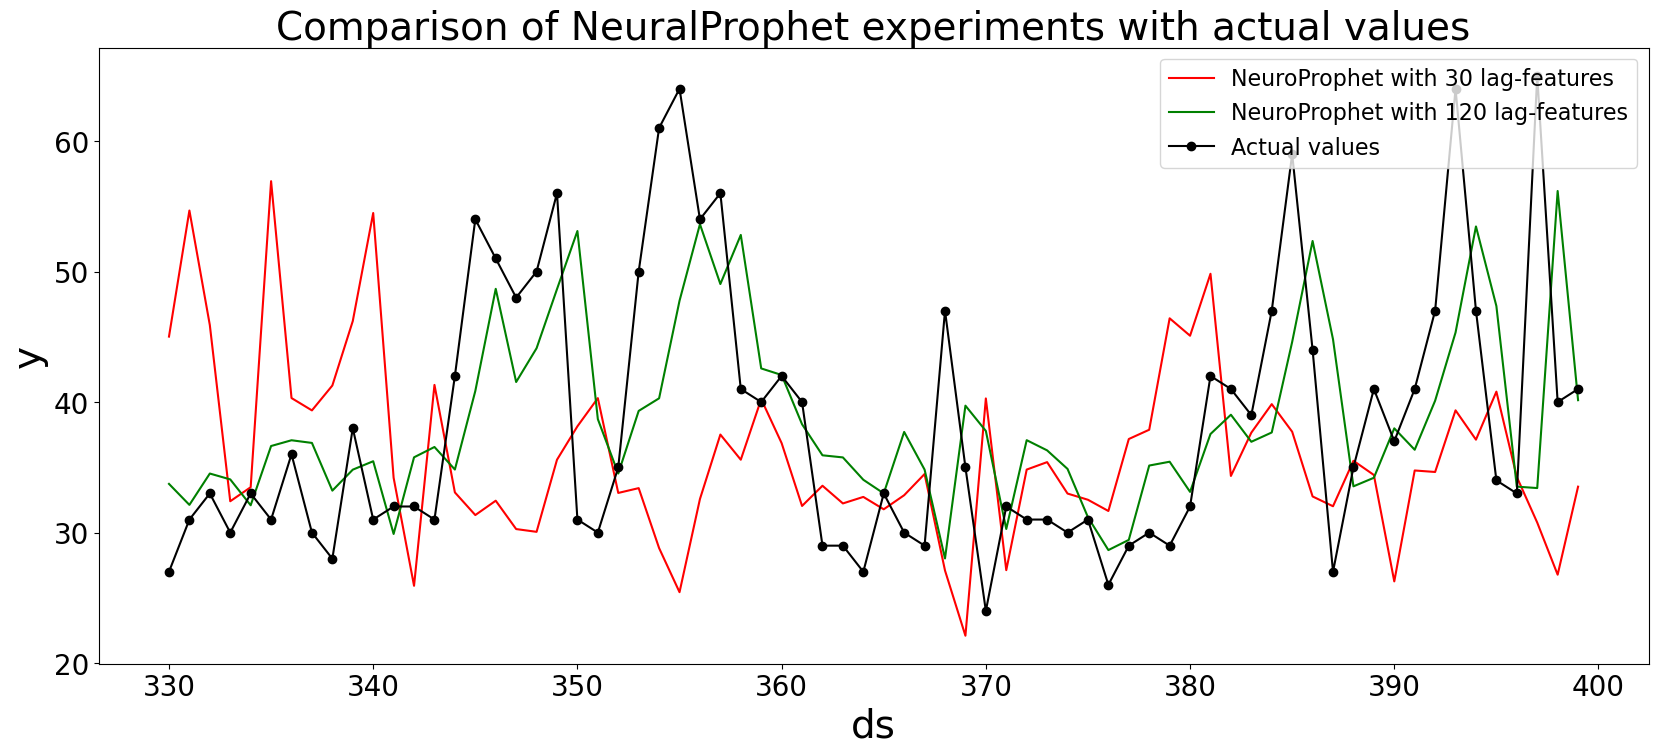

In [110]:
### Compare two experiments with different number of lag-features
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(experiments_dict["experiment two"]['yhat1'][330:400], '-r', color='red', label="NeuroProphet with 30 lag-features")  
ax.plot(experiments_dict["experiment three"]['yhat1'][330:400], '-r', color='green', label="NeuroProphet with 120 lag-features")
ax.plot(df_val["y"][330:400], '-o', color='black', label="Actual values")
ax.legend(loc='upper right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("ds", fontsize=28)
ax.set_ylabel("y", fontsize=28)
ax.set_title("Comparison of NeuralProphet experiments with actual values", fontsize=28)
plt.show()

По графику видно что вариант с 120 lag-фичами немного точнее приближает график реальных значений. <br>
Попробуем еще в качестве эксперимента вариант с 240 и 360 lag-фичами

In [111]:
### experiment four
m = NeuralProphet(n_lags=240)
df_train, df_val = m.split_df(df, freq='D', valid_p = 0.3)
metrics = m.fit(df_train, freq='D', validation_df=df_val)
forecast = m.predict(df_val)
experiments_dict['experiment four'] = forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.961% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 151


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.65E-02, min: 6.60E-02


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.18E+00, min: 1.44E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.08E-01
Epoch[151/151]: 100%|██████████| 151/151 [00:17<00:00,  8.43it/s, SmoothL1Loss=0.0107, MAE=6.84, RMSE=9.32, RegLoss=0, MAE_val=6.47, RMSE_val=8.49, SmoothL1Loss_val=0.00853]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.92% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.92% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


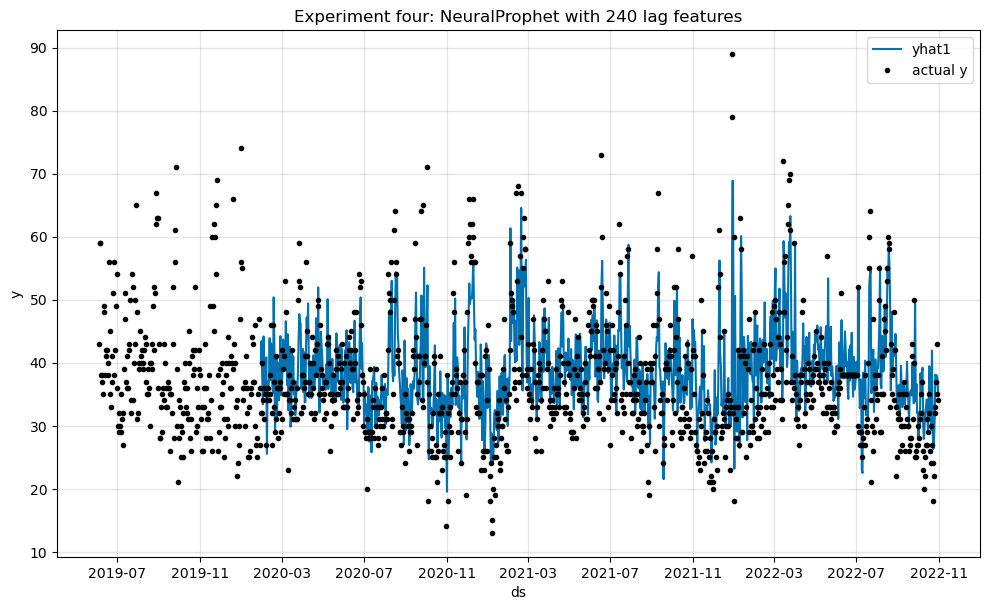

In [112]:
m.plot(forecast)
plt.title('Experiment four: NeuralProphet with 240 lag features')
plt.show()

In [113]:
### experiment five
m = NeuralProphet(n_lags=360)
df_train, df_val = m.split_df(df, freq='D', valid_p = 0.3)
metrics = m.fit(df_train, freq='D', validation_df=df_val)
forecast = m.predict(df_val)
experiments_dict['experiment five'] = forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.962% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 152


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.60E-02, min: 7.71E-02


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.68E-01, min: 5.65E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.21E-01
Epoch[152/152]: 100%|██████████| 152/152 [00:17<00:00,  8.62it/s, SmoothL1Loss=0.0102, MAE=6.69, RMSE=9.07, RegLoss=0, MAE_val=6.52, RMSE_val=8.67, SmoothL1Loss_val=0.00889]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.925% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.925% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


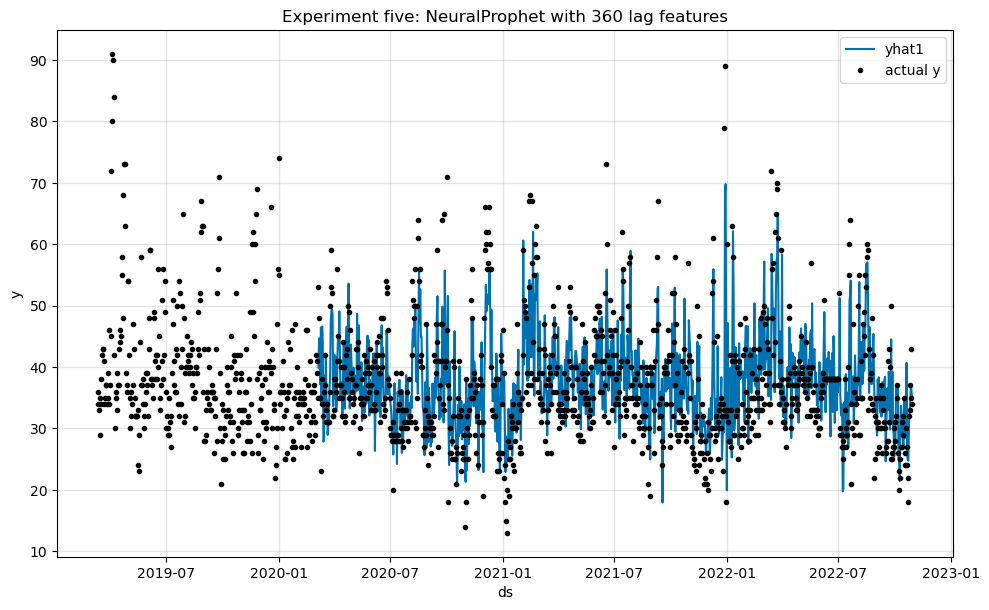

In [114]:
m.plot(forecast)
plt.title('Experiment five: NeuralProphet with 360 lag features')
plt.show()

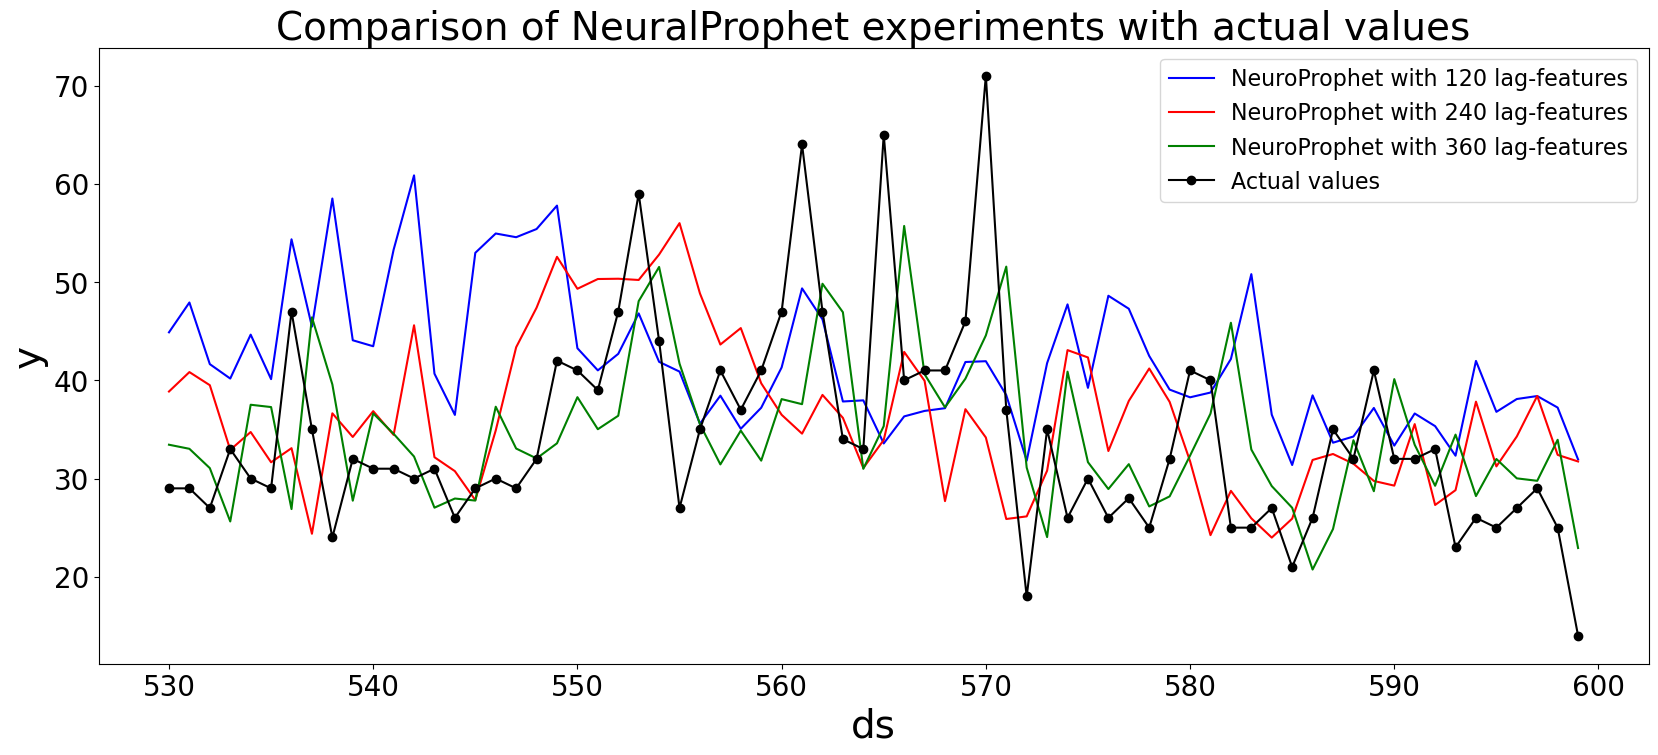

In [119]:
fig, ax = plt.subplots(figsize=(20, 8))
# ax.plot(experiments_dict["experiment two"]['yhat1'][530:600], '-r', color='orange', label="NeuroProphet with 30 lag-features")  
ax.plot(experiments_dict["experiment three"]['yhat1'][530:600], '-r', color='blue', label="NeuroProphet with 120 lag-features")
ax.plot(experiments_dict["experiment four"]['yhat1'][530:600], '-r', color='red', label="NeuroProphet with 240 lag-features")  
ax.plot(experiments_dict["experiment five"]['yhat1'][530:600], '-r', color='green', label="NeuroProphet with 360 lag-features")
ax.plot(df_val["y"][530:600], '-o', color='black', label="Actual values")
ax.legend(loc='upper right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("ds", fontsize=28)
ax.set_ylabel("y", fontsize=28)
ax.set_title("Comparison of NeuralProphet experiments with actual values", fontsize=28)
plt.show()

Кажется что при увеличении кол-ва lag-фичей предсказанные значения лучше соотносятся с реальными значениями AQI. От 360 уже получается довольно неплохое приближение графика. Для дальнейших экспериментов выберем кол-во lag-фичей чуть больше 360 (равное 400) и на этом пока остановимся.

In [195]:
### experiment six
m = NeuralProphet(
    n_lags=400,
)
df_train, df_val = m.split_df(df, freq='D', valid_p = 0.3)
metrics = m.fit(df_train, freq='D', validation_df=df_val)
forecast = m.predict(df_val)
experiments_dict['experiment six'] = forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.962% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 153


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.83E-02, min: 5.65E-02


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.16E-04, min: 4.14E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.44E-02
Epoch[153/153]: 100%|██████████| 153/153 [00:19<00:00,  8.01it/s, SmoothL1Loss=0.0093, MAE=6.46, RMSE=8.68, RegLoss=0, MAE_val=6.58, RMSE_val=8.81, SmoothL1Loss_val=0.00918] 
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.926% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.926% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


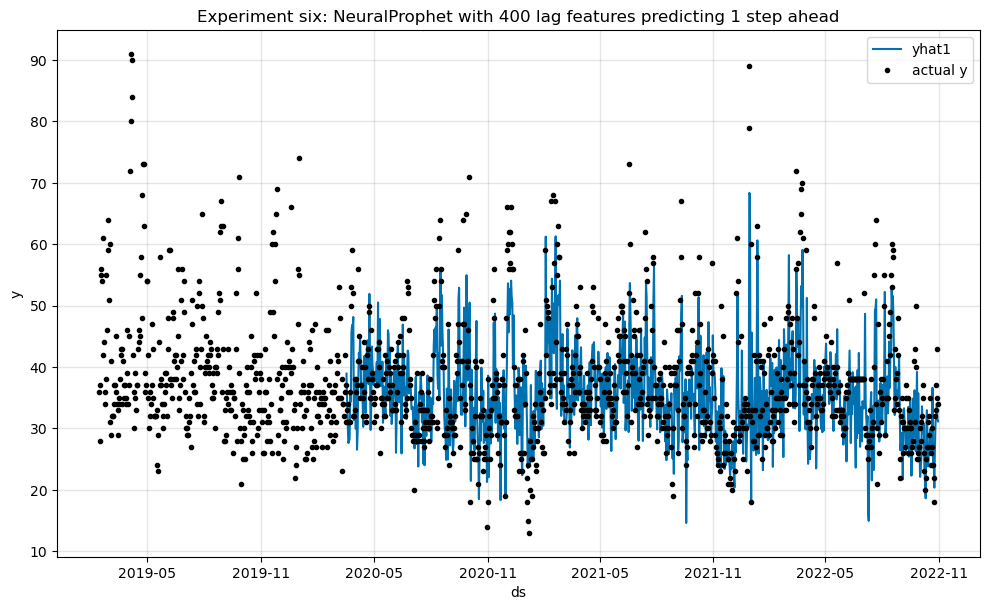

In [196]:
m.plot(forecast)
plt.title('Experiment six: NeuralProphet with 400 lag features predicting 1 step ahead')
plt.show()

In [129]:
### experiment seven
m = NeuralProphet(
    n_lags=400,
    n_forecasts = 7
)
df_train, df_val = m.split_df(df, freq='D', valid_p = 0.3)
metrics = m.fit(df_train, freq='D', validation_df=df_val)
forecast = m.predict(df_val)
experiments_dict['experiment seven'] = forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.962% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 153


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.03E-02, min: 4.14E-02


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.14E-02, min: 4.83E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.00E-02
Epoch[153/153]: 100%|██████████| 153/153 [00:23<00:00,  6.55it/s, SmoothL1Loss=0.0133, MAE=7.73, RMSE=10.5, RegLoss=0, MAE_val=7.82, RMSE_val=10.3, SmoothL1Loss_val=0.0126]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.926% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.927% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


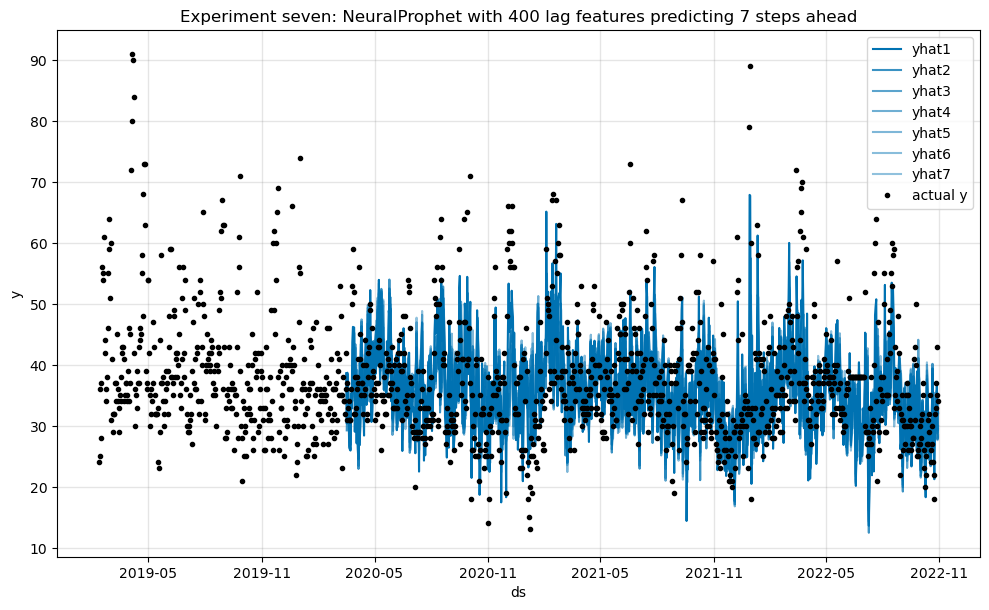

In [130]:
m.plot(forecast)
plt.title('Experiment seven: NeuralProphet with 400 lag features predicting 7 steps ahead')
plt.show()

Параметр "n_forecasts" мы оставим равным 1, так как метрики для такого варианта все-таки похуже.

Теперь сравним полученную итоговую модель с простой линейной регрессией с таким же количеством фичей.

In [146]:
def feature_creator(df_temp,number_of_lag_features=400): # Generate only numeric features
    df = df_temp.copy()
    df.columns = ['aqi_d0']
    n_features = int(number_of_lag_features)
    current_column_name = 'aqi_d0'
    prev_column_name = 'aqi_d0'
    iternum = 1
    for i in range(n_features):
        current_column_name = current_column_name[:5] + str(iternum)
        df[current_column_name] = df[prev_column_name].shift(1)
        iternum +=1
        prev_column_name = current_column_name
    return df

In [150]:
tsf = pd.read_csv('STA-DK0034A.csv', low_memory=False)
tsf['DatetimeEnd'] = pd.to_datetime(tsf['DatetimeEnd'], format="%Y-%m-%d %H:%M:%S")
tsf = tsf.set_index('DatetimeEnd')
tsf400 = feature_creator(tsf)
tsf400.head().T

DatetimeEnd,2013-01-01 00:00:00+01:00,2013-01-02 00:00:00+01:00,2013-01-03 00:00:00+01:00,2013-01-04 00:00:00+01:00,2013-01-05 00:00:00+01:00
aqi_d0,21.0,41.0,39.0,48.0,33.0
aqi_d1,NaN,21.0,41.0,39.0,48.0
aqi_d2,NaN,NaN,21.0,41.0,39.0
aqi_d3,NaN,NaN,NaN,21.0,41.0
aqi_d4,NaN,NaN,NaN,NaN,21.0
...,...,...,...,...,...
aqi_d396,NaN,NaN,NaN,NaN,NaN
aqi_d397,NaN,NaN,NaN,NaN,NaN
aqi_d398,NaN,NaN,NaN,NaN,NaN
aqi_d399,NaN,NaN,NaN,NaN,NaN


In [151]:
tsf400 = tsf400.iloc[400:,:]
tsf400.head().T

DatetimeEnd,2014-02-05 00:00:00+01:00,2014-02-06 00:00:00+01:00,2014-02-07 00:00:00+01:00,2014-02-08 00:00:00+01:00,2014-02-09 00:00:00+01:00
aqi_d0,52.0,63.0,39.0,33.0,28.0
aqi_d1,35.0,52.0,63.0,39.0,33.0
aqi_d2,32.0,35.0,52.0,63.0,39.0
aqi_d3,30.0,32.0,35.0,52.0,63.0
aqi_d4,96.0,30.0,32.0,35.0,52.0
...,...,...,...,...,...
aqi_d396,33.0,24.0,29.0,32.0,33.0
aqi_d397,48.0,33.0,24.0,29.0,32.0
aqi_d398,39.0,48.0,33.0,24.0,29.0
aqi_d399,41.0,39.0,48.0,33.0,24.0


In [197]:
df_val.head()

,ds,y
0,2019-02-12,36.0
1,2019-02-13,28.0
2,2019-02-14,37.0
3,2019-02-15,56.0
4,2019-02-16,55.0


In [198]:
def data_splitter(df_temp):
    df = df_temp
    df_train = df[df.index < "2019-02-12 00:00:00+01:00"].copy()
    df_test = df[df.index >= "2019-02-12 00:00:00+01:00"].copy()
    return df_train, df_test

In [199]:
df_train400, df_test400 = data_splitter(tsf400)

In [200]:
columns_to_drop = ['aqi_d0']
y_train400 = df_train400['aqi_d0']
X_train400 = df_train400.drop(columns_to_drop, axis=1)
y_test400 = df_test400['aqi_d0']
X_test400 = df_test400.drop(columns_to_drop, axis=1)

In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [188]:
# df_train, df_val
display(df_train.head())
display(df_val.tail())
display(df_test400.tail())

,ds,y
0,2013-01-01,21.0
1,2013-01-02,41.0
2,2013-01-03,39.0
3,2013-01-04,48.0
4,2013-01-05,33.0


,ds,y
533,2022-10-26,33.0
534,2022-10-27,37.0
535,2022-10-28,43.0
536,2022-10-29,35.0
537,2022-10-30,34.0


,aqi_d0,aqi_d1,aqi_d2,aqi_d3,aqi_d4,aqi_d5,aqi_d6,aqi_d7,aqi_d8,aqi_d9,...,aqi_d391,aqi_d392,aqi_d393,aqi_d394,aqi_d395,aqi_d396,aqi_d397,aqi_d398,aqi_d399,aqi_d400
DatetimeEnd,,,,,,,,,,,,,,,,,,,,,
2022-10-26 00:00:00+01:00,33.0,32.0,22.0,18.0,24.0,27.0,30.0,24.0,26.0,35.0,...,27.0,41.0,42.0,46.0,41.0,39.0,39.0,34.0,40.0,40.0
2022-10-27 00:00:00+01:00,37.0,33.0,32.0,22.0,18.0,24.0,27.0,30.0,24.0,26.0,...,29.0,27.0,41.0,42.0,46.0,41.0,39.0,39.0,34.0,40.0
2022-10-28 00:00:00+01:00,43.0,37.0,33.0,32.0,22.0,18.0,24.0,27.0,30.0,24.0,...,34.0,29.0,27.0,41.0,42.0,46.0,41.0,39.0,39.0,34.0
2022-10-29 00:00:00+01:00,35.0,43.0,37.0,33.0,32.0,22.0,18.0,24.0,27.0,30.0,...,52.0,34.0,29.0,27.0,41.0,42.0,46.0,41.0,39.0,39.0
2022-10-30 00:00:00+01:00,34.0,35.0,43.0,37.0,33.0,32.0,22.0,18.0,24.0,27.0,...,42.0,52.0,34.0,29.0,27.0,41.0,42.0,46.0,41.0,39.0


In [210]:
### Standard linear regression with 400 features
scaler = StandardScaler()
scaler.fit(X_train400)
X_train_scaled = scaler.transform(X_train400)
X_test_scaled = scaler.transform(X_test400)
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train400)
pred_train400 = lr_scaled.predict(X_train_scaled)
pred_test400 = lr_scaled.predict(X_test_scaled)
print('for TRAIN:')
print('RMSE:', np.sqrt(MSE(y_train400, pred_train400)))
print('R2:', r2_score(y_train400, pred_train400))
print('for TEST:')
print('RMSE:', np.sqrt(MSE(y_test400, pred_test400)))
print('R2:', r2_score(y_test400, pred_test400))

for TRAIN:
RMSE: 9.039059274717216
R2: 0.5422775715804735
for TEST:
RMSE: 9.14422140140031
R2: 0.18543350317788387


In [204]:
linreg_results = df_test400.copy()
linreg_results.drop(linreg_results.iloc[:, 1:], inplace=True, axis=1)
linreg_results['pred'] = pred_test400
linreg_results.head()

,aqi_d0,pred
DatetimeEnd,,
2019-02-12 00:00:00+01:00,36.0,27.537857
2019-02-13 00:00:00+01:00,28.0,31.580590
2019-02-14 00:00:00+01:00,37.0,31.994128
2019-02-15 00:00:00+01:00,56.0,27.866669
2019-02-16 00:00:00+01:00,55.0,45.171149


In [205]:
linreg_results.tail()

,aqi_d0,pred
DatetimeEnd,,
2022-10-26 00:00:00+01:00,33.0,35.392419
2022-10-27 00:00:00+01:00,37.0,35.671810
2022-10-28 00:00:00+01:00,43.0,38.641666
2022-10-29 00:00:00+01:00,35.0,39.173687
2022-10-30 00:00:00+01:00,34.0,33.674341


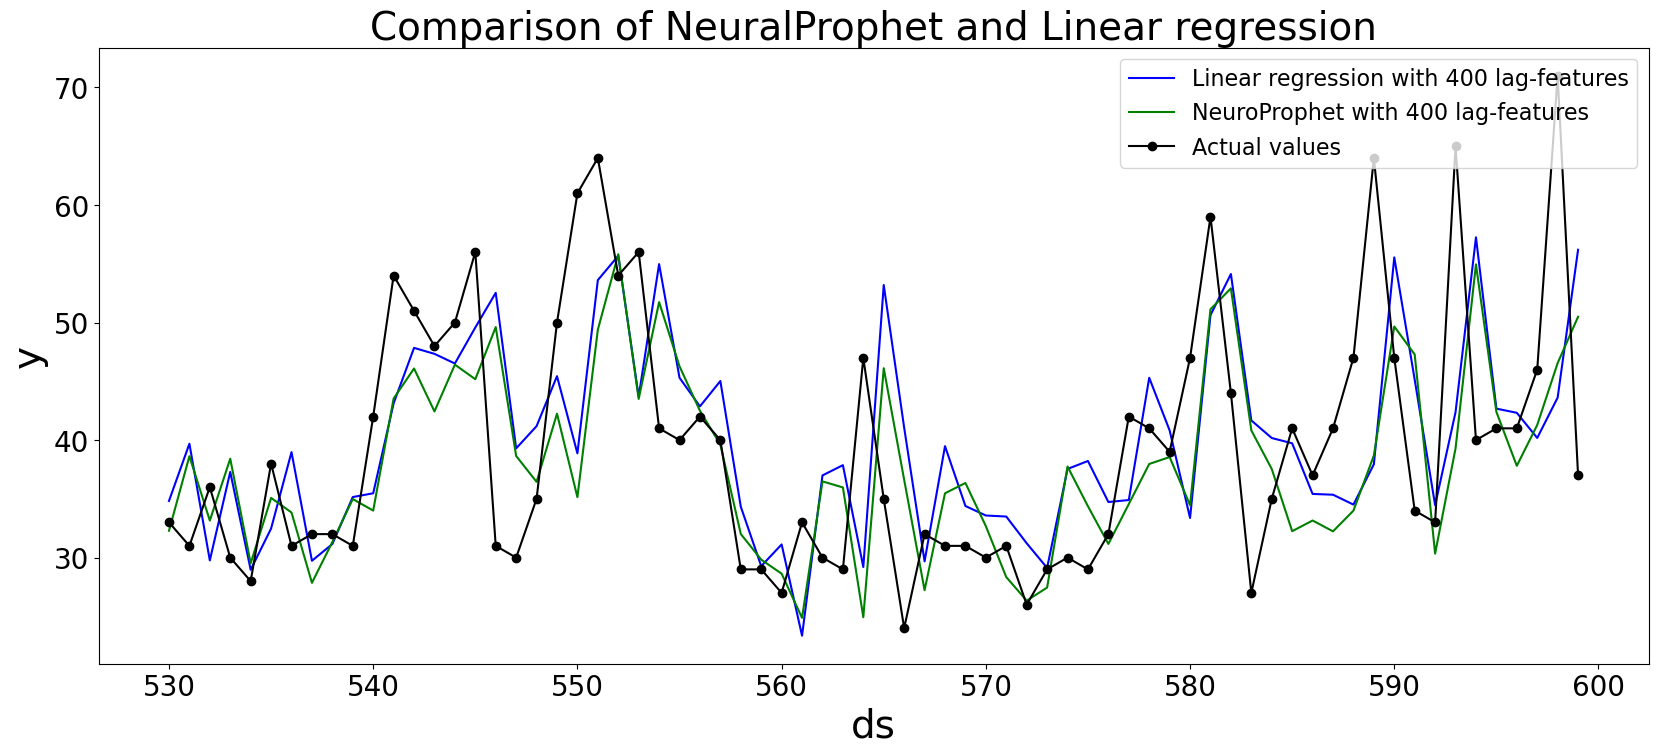

In [208]:
fig, ax = plt.subplots(figsize=(20, 8))  
ax.plot(pd.Series(pred_test400)[530:600], '-r', color='blue', label="Linear regression with 400 lag-features")
ax.plot(experiments_dict["experiment six"]['yhat1'][530:600], '-r', color='green', label="NeuroProphet with 400 lag-features")
ax.plot(experiments_dict["experiment six"]["y"][530:600], '-o', color='black', label="Actual values")
ax.legend(loc='upper right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("ds", fontsize=28)
ax.set_ylabel("y", fontsize=28)
ax.set_title("Comparison of NeuralProphet and Linear regression", fontsize=28)
plt.show()